# Name : Aayush Modi
### Mall Customer Segmentation Data
### Task 2 : Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [137]:
# Loading the Dataset
mall_data = pd.read_csv('Mall_Customers.csv')

In [138]:
# Showing basic info and stats
mall_data.info()
mall_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


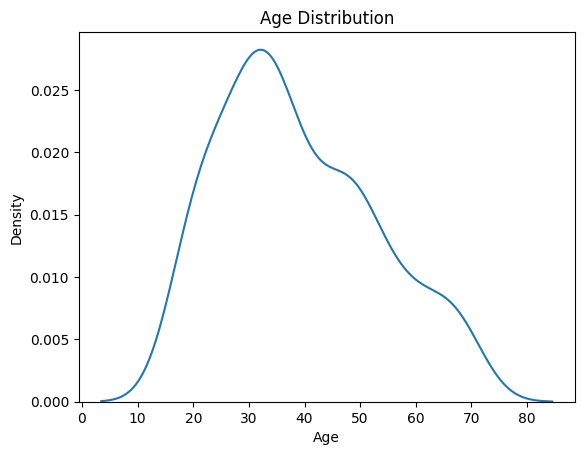

In [139]:
sns.kdeplot(mall_data['Age'])
plt.title('Age Distribution')
plt.show()

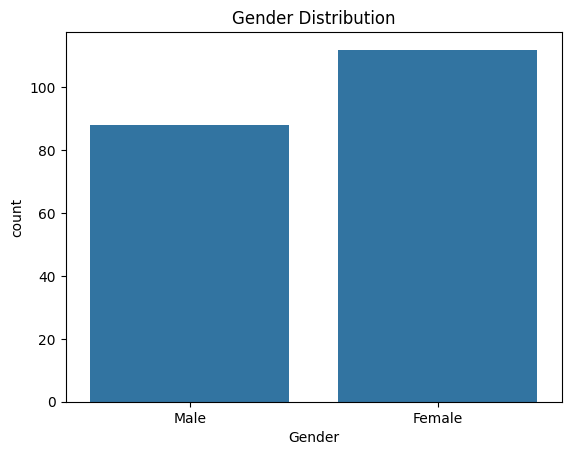

In [140]:
# Plot the count of customers by Gender
sns.countplot(x='Gender', data=mall_data)
plt.title('Gender Distribution')
plt.show()

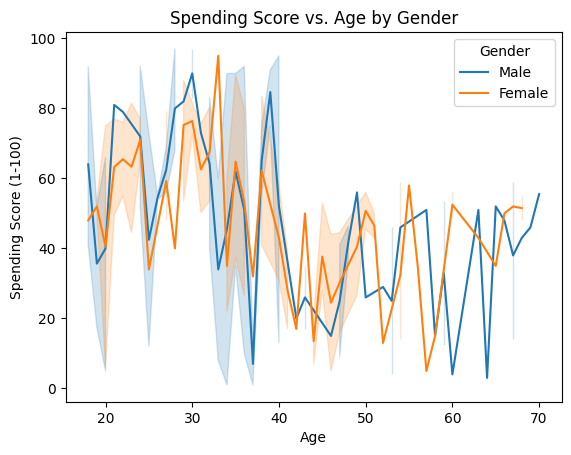

In [141]:
# Plot Spending Score vs. Age, colored by Gender
sns.lineplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=mall_data)
plt.title('Spending Score vs. Age by Gender')
plt.show()  

In [142]:
# Select features for clustering: Age, Income, and Spending Score
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

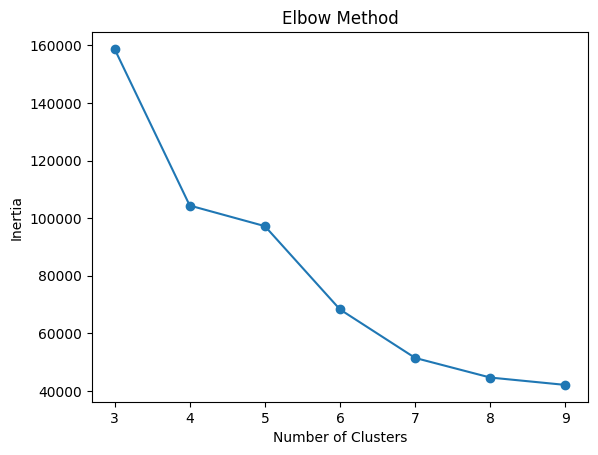

In [143]:
# Determine the best number of clusters using the elbow method
inertia = []
for i in range(3, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(3, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [144]:
# Apply K-means with 6 clusters (based on the elbow method)
kmeans_model = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

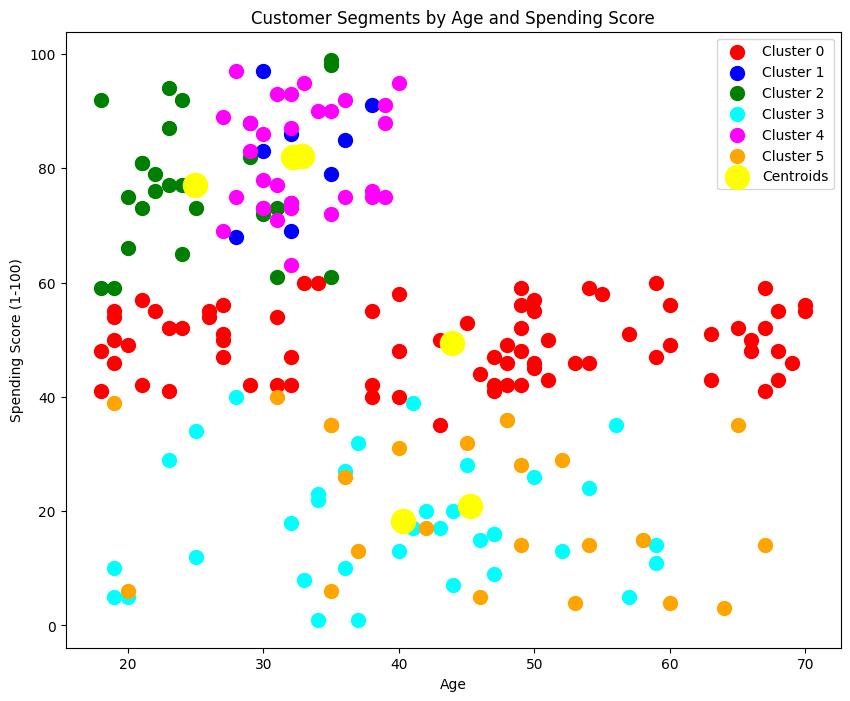

In [145]:
# Get the cluster centers
centroids = kmeans_model.cluster_centers_


# Plot the clusters: Age vs. Spending Score
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']
for i in range(6):
    plt.scatter(X['Age'][y_kmeans == i], X['Spending Score (1-100)'][y_kmeans == i], 
                s=100, c=colors[i], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments by Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

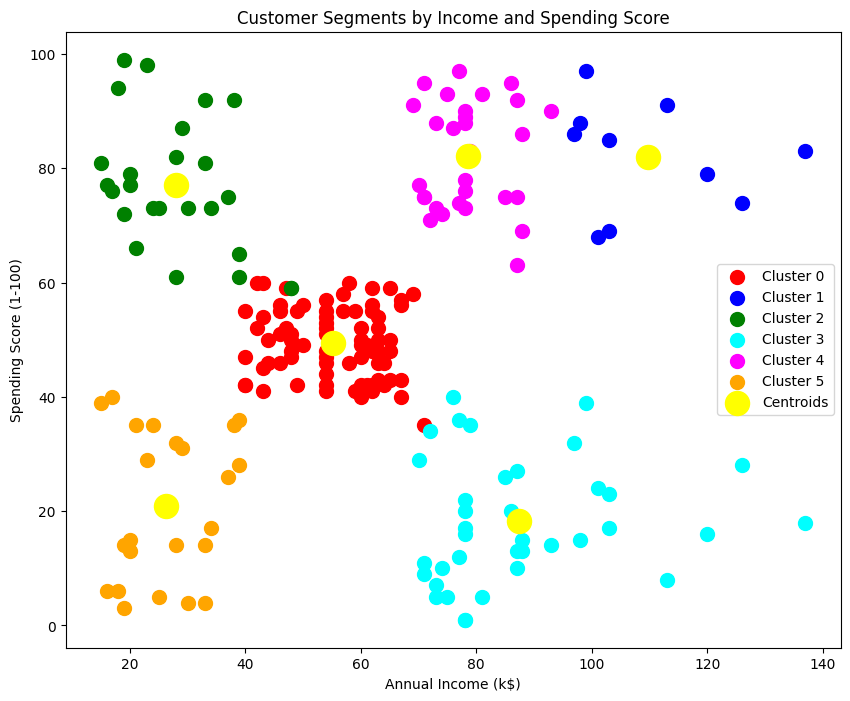

In [146]:
# Plot the clusters: Annual Income vs. Spending Score
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.scatter(X['Annual Income (k$)'][y_kmeans == i], X['Spending Score (1-100)'][y_kmeans == i], 
                s=100, c=colors[i], label=f'Cluster {i}')
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

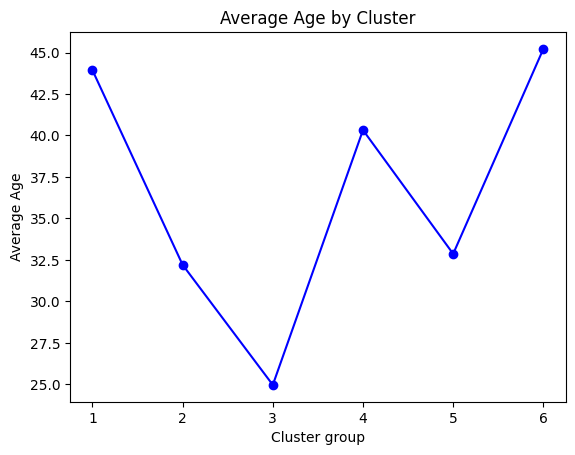

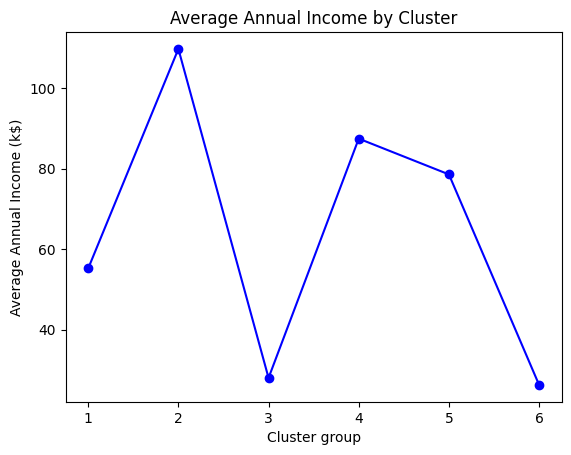

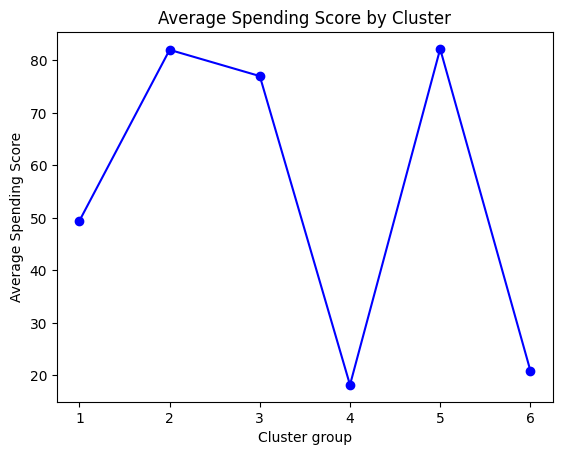

In [147]:
# Calculate and plot average Age, Annual Income, and Spending Score for each cluster
age_means = X.groupby(y_kmeans)['Age'].mean()
income_means = X.groupby(y_kmeans)['Annual Income (k$)'].mean()
spending_means = X.groupby(y_kmeans)['Spending Score (1-100)'].mean()

plt.plot(range(1, 7), age_means, 'bo-')
plt.title('Average Age by Cluster')
plt.xlabel('Cluster group')
plt.ylabel('Average Age')
plt.show()

plt.plot(range(1, 7), income_means, 'bo-')
plt.title('Average Annual Income by Cluster')
plt.xlabel('Cluster group')
plt.ylabel('Average Annual Income (k$)')
plt.show()

plt.plot(range(1, 7), spending_means, 'bo-')
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster group')
plt.ylabel('Average Spending Score')
plt.show()